In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill: ast.literal_eval(skill)if pd.notna(skill)else skill)

In [3]:
df_DA_US=df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='United States')]
df_DA_US.dropna(subset='salary_year_avg')

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782637,Data Analyst,Data Integration Analyst,"Germantown, WI",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-01-20 06:18:43,True,False,United States,year,70000.0,NaN,Virtual Benefits Administrator,"[vba, sql, sql server]","{'databases': ['sql server'], 'programming': [..."
782798,Data Analyst,Reference Data Analyst,"New York, NY",via Ai-Jobs.net,Full-time,False,"New York, United States",2023-04-21 05:59:51,True,False,United States,year,111175.0,NaN,DRW,[terminal],{'other': ['terminal']}
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","[sql, r, python, hadoop, excel]","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,[unix],{'os': ['unix']}


Text(0, 0.5, 'number of jobs')

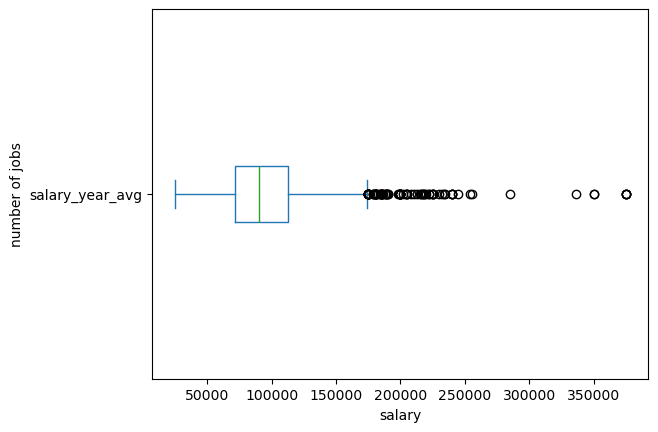

In [4]:
df_DA_US['salary_year_avg'].plot(kind='box',vert=False)
plt.xlabel('salary')
plt.ylabel('number of jobs')

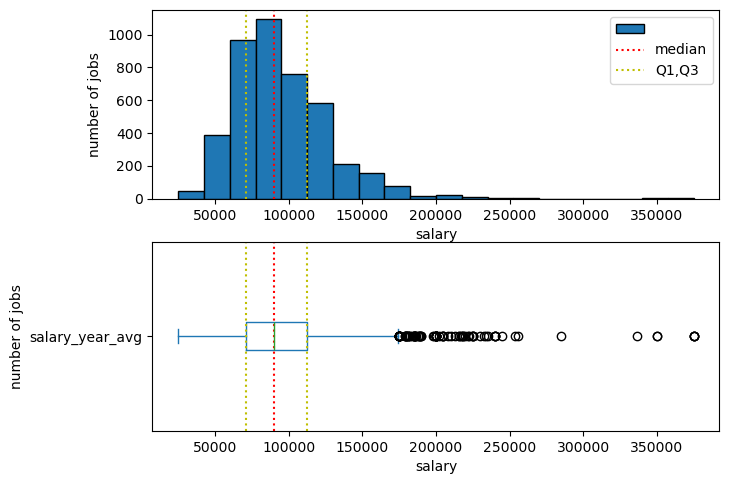

In [8]:
fig,ax=plt.subplots(2,1)
fig.tight_layout(h_pad=1)

df_DA_US['salary_year_avg'].plot(kind='hist',bins=20,edgecolor='black',ax=ax[0])

ax[0].set_xlabel('salary')
ax[0].set_ylabel('number of jobs')
ax[0].axvline(df_DA_US['salary_year_avg'].median(),color='r',linestyle=':')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(.25),color='y',linestyle=':')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(.75),color='y',linestyle=':')
ax[0].legend(['','median','Q1,Q3'])
df_DA_US['salary_year_avg'].plot(kind='box',vert=False,ax=ax[1])

ax[1].set_xlabel('salary')
ax[1].set_ylabel('number of jobs')
ax[1].axvline(df_DA_US['salary_year_avg'].median(),color='r',linestyle=':')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(.25),color='y',linestyle=':')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(.75),color='y',linestyle=':')
plt.show()
